In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import joblib
import csv

In [2]:
csvfile = '../Resources/Callstreet_Bets.csv'
data = pd.read_csv(csvfile)
data = data.fillna(0)
data.head()

,Date,ticker,mention_count,percent_change
0,2021-01-28,AMC,214.0,0.0
1,2021-01-28,BB,123.0,0.0
2,2021-01-28,CLF,0.0,0.0
3,2021-01-28,CLNE,0.0,0.0
4,2021-01-28,CLOV,1.0,0.0


In [36]:
df_10_or_more_mentions = data[data['mention_count'] >= 10]

In [37]:
df_10_or_more_mentions.head()

,Date,ticker,mention_count,percent_change
0,2021-01-28,AMC,214.0,0.000000
1,2021-01-28,BB,123.0,0.000000
6,2021-01-28,GME,419.0,0.000000
9,2021-01-28,SENS,11.0,0.000000
12,2021-01-29,AMC,2276.0,0.429507


In [38]:
X = df_10_or_more_mentions['mention_count'].values.reshape(-1, 1)
y = df_10_or_more_mentions['percent_change'].values.reshape(-1, 1)

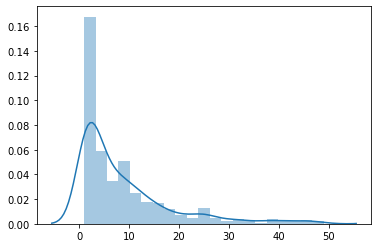

In [15]:
sns.distplot(X[X < 50])

In [39]:
print(len(X))

264


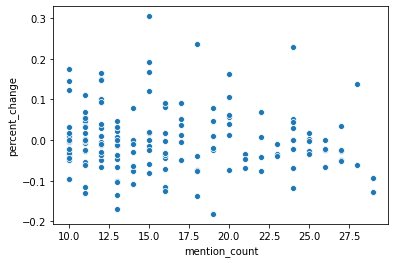

In [43]:
sns.scatterplot(x = 'mention_count', y = 'percent_change', data = df_10_or_more_mentions[df_10_or_more_mentions['mention_count'] < 30])

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=4, test_size=0.33)
#x_train

In [ ]:
x_test

In [ ]:
y_train

In [ ]:
y_test

In [45]:
tree_regressor = DecisionTreeRegressor()
model = tree_regressor.fit(x_train,y_train)

In [46]:
model.score(x_test, y_test)

-0.18414601569920364

In [47]:
model.score(x_train, y_train)

0.7899358835644923

In [50]:
filename = "model.sav"
joblib.dump(model, filename)

['model.sav']

In [51]:
loaded_model = joblib.load(filename)

In [58]:
loaded_model.predict([[380]])*100

array([-10.00064187])

In [ ]:
for mention in range(100,400,20):
    print(mention, loaded_model.predict([[mention]]))

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
clf.score(x_test, y_test)